In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorConv2d

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_conv2d = TimeProcessorConv2d(base_dir, is_forward=False)
df = time_processor_conv2d.get_data(sample_rate=0.3)

/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:216: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


In [3]:
df.query("time < 0")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
74052,32.32.512.32.1024.4096.512.7.3.1.1.0,-4.0,32,32,512,32,1024,4096,512,7,3,1,1,0,9.235898e+04
74701,32.32.1024.32.1024.4096.1024.7.5.1.1.0,-4.0,32,32,1024,32,1024,4096,1024,7,5,1,1,0,3.078633e+05
74921,16.32.512.32.1024.4096.512.5.7.1.1.0,-4.0,16,32,512,32,1024,4096,512,5,7,1,1,0,1.539316e+05
75049,16.32.1024.32.1024.4096.1024.3.5.1.1.0,-4.0,16,32,1024,32,1024,4096,1024,3,5,1,1,0,1.319414e+05
75328,32.32.1024.32.1024.4096.1024.7.3.1.1.0,-4.0,32,32,1024,32,1024,4096,1024,7,3,1,1,0,1.847180e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205545,16.2.2048.1024.1024.2048.1024.7.3.1.1.1,-1.0,16,2,2048,1024,1024,2048,1024,7,3,1,1,1,3.694359e+05
205546,16.2.64.1024.1024.64.1.7.7.1.1.1,-1.0,16,2,64,1024,1024,64,1,7,7,1,1,1,8.418136e+02
205547,32.4.512.1024.1024.512.64.7.5.1.1.1,-1.0,32,4,512,1024,1024,512,64,7,5,1,1,1,7.696581e+04
205548,32.32.1024.1024.1024.1024.256.7.3.1.1.1,-1.0,32,32,1024,1024,1024,1024,256,7,3,1,1,1,1.477744e+06


In [4]:
df["time"].isna().sum()

148

In [5]:
df = df.query("time >= 0").dropna()
df

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
0,32.16.32.8.8.1024.1.3.5.1.1.0,0.121344,32,16,32,8,8,1024,1,3,5,1,1,0,1.006633
1,b16.8.512.8.8.1024.1.3.5.1.1.0,0.095744,b16,8,512,8,8,1024,1,3,5,1,1,0,8.053064
2,b16.8.512.8.8.128.128.5.3.1.1.0,0.096768,b16,8,512,8,8,128,128,5,3,1,1,0,1.006633
3,b16.2.8.8.8.1024.1.3.5.1.1.0,0.144896,b16,2,8,8,8,1024,1,3,5,1,1,0,0.031457
4,b16.8.512.8.8.512.1.3.3.1.1.0,0.111616,b16,8,512,8,8,512,1,3,3,1,1,0,2.415919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203583,b16.2.128.1024.1024.4096.1.5.5.1.1.0,293.607422,b16,2,128,1024,1024,4096,1,5,5,1,1,0,54975.581389
203587,b16.2.2048.1024.1024.2048.1.5.3.1.1.0,1739.183594,b16,2,2048,1024,1024,2048,1,5,3,1,1,0,263882.790666
203592,b16.2.1024.1024.1024.1024.1.5.7.1.1.0,1425.935852,b16,2,1024,1024,1024,1024,1,5,7,1,1,0,153931.627889
204627,b16.2.512.1024.1024.512.1.3.3.1.1.1,63.843328,b16,2,512,1024,1024,512,1,3,3,1,1,1,9895.604650


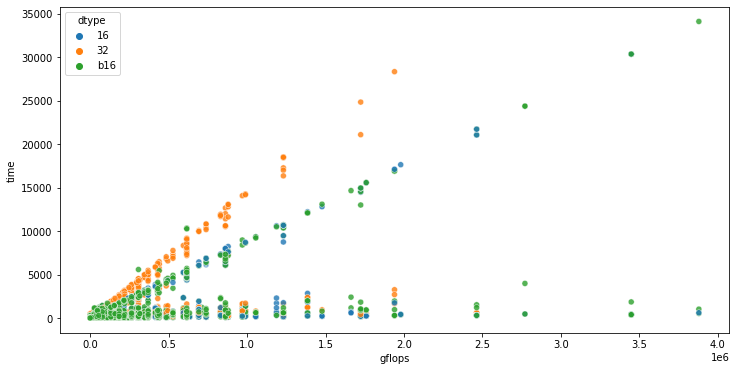

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.8, data=df)
plt.show()

32---------------------------------------


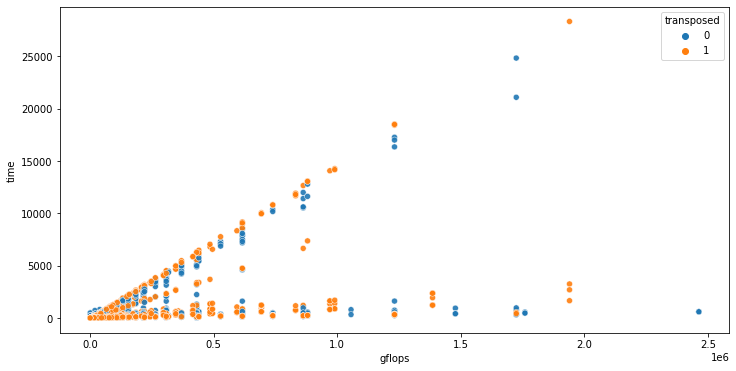

b16---------------------------------------


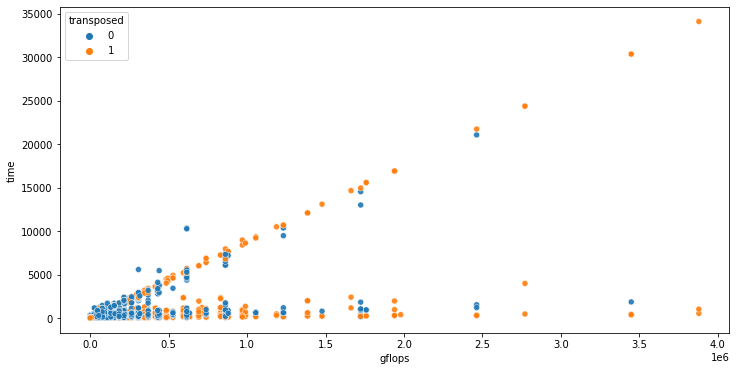

16---------------------------------------


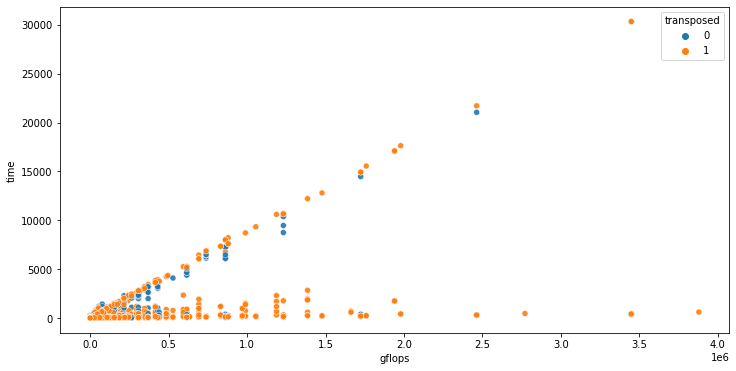

In [7]:
for dtype in ["32", "b16", "16"]:
    print(f"{dtype}---------------------------------------")
    plt.figure(figsize=(12,6))
    sns.scatterplot(x="gflops", y="time", hue="transposed", alpha=0.9, data=df.query(f"dtype == '{dtype}'"))
    plt.show()